In [1]:
import pandas as pd
import numpy as np
import os
import pydicom
from utils import *

from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
sample_folder_path1 = '/home/work/LUS/Dataset/original_dataset/2024_07_29_sample_data'

sample_paths1 = load_file_path(sample_folder_path1, DCM_EXTENSION, all_sub_folders=True)

# total_sample_path = sample_paths1 + sample_paths2
total_slices = [pydicom.read_file(path, force=True) for path in sample_paths1]

In [4]:
# total_sample_path
sample_paths1

['/home/work/LUS/Dataset/original_dataset/2024_07_29_sample_data/14184938/00001.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_29_sample_data/14184938/00002.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_29_sample_data/14184938/00003.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_29_sample_data/14184938/00004.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_29_sample_data/14184938/00005.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_29_sample_data/37292786/00001.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_29_sample_data/37292786/00002.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_29_sample_data/37292786/00003.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_29_sample_data/37292786/00004.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_29_sample_data/37292786/00005.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_29_sample_data/50647226/00001.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_29_s

In [5]:
# 환자 정보 이미지 제거
slices = [idx for idx in total_slices if (0x018, 0x6011) in idx]
no_slices = [idx for idx in total_slices if (0x018, 0x6011) not in idx]

print(f'lus_image : {len(slices)}')
print(f'no_lus_image : {len(no_slices)}')

lus_image : 20
no_lus_image : 5


In [6]:
(0x018, 0x6011)

(24, 24593)

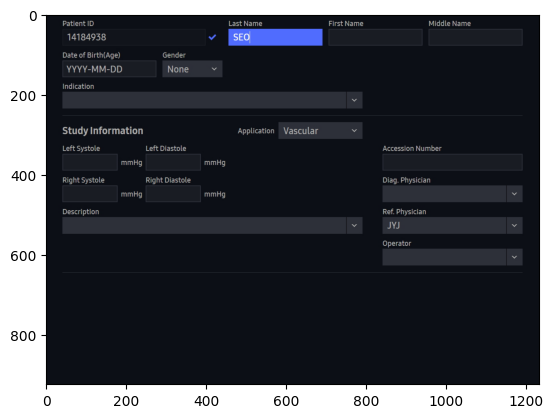

In [7]:
plt.imshow(no_slices[0].pixel_array)

In [11]:
(0x018, 0x6011)

(24, 24593)

In [12]:
total_slices[0]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 226
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Ultrasound Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.410.200001.101.11.601.1791001860.3.20240712110614000
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.410.200003.2020819.5.2.1
(0002, 0013) Implementation Version Name         SH: 'MAROTECH REGISTER 5.0'
(0002, 0016) Source Application Entity Title     AE: 'ACQ1_8054'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: Ultrasound Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.410.20000

In [13]:
(0x10, 0x20)

(16, 32)

In [14]:
total_slices[0].PatientID = 4965778
total_slices[0].PatientID

/home/work/.local/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: A value of type 'int' cannot be assigned to a tag with VR LO.
  warnings.warn(msg)


4965778

## 중복된 case 제거
- dicom header에 'SOPInstanceUID' 정보다 중복되는 경우가 존재하기 때문에 이를 이용해서 제거 진행

In [8]:
!pwd

/home/work/LUS/code


In [18]:
ex_folder_path = '/home/work/LUS/Dataset/original_dataset/2024_07_16_sample_data/44937986'
ex_paths = load_file_path(ex_folder_path, DCM_EXTENSION, all_sub_folders=True)

In [19]:
ex_paths

['/home/work/LUS/Dataset/original_dataset/2024_07_16_sample_data/44937986/00001.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_16_sample_data/44937986/00002.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_16_sample_data/44937986/00003.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_16_sample_data/44937986/00004.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_16_sample_data/44937986/00005.dcm',
 '/home/work/LUS/Dataset/original_dataset/2024_07_16_sample_data/44937986/00006.dcm']

In [20]:
ex_slices = [pydicom.read_file(path, force=True) for path in ex_paths]

In [21]:
len(ex_slices)

6

In [22]:
ex_slices[0].SOPInstanceUID

'1.2.410.200001.101.11.601.1791001860.3.20240712110614000'

In [23]:
ex_slices[0][0x0008, 0x1111][0][0x0008, 0x1155].value

'1.2.410.200001.101.11.601.1791001860.4.20240712110613638'

In [24]:
ex_slices[2][0x0008, 0x1111][0][0x0008, 0x1155].value

'1.2.410.200001.101.11.601.1791001860.4.20240712110613638'

In [28]:
ex_paths

KeyError: (0008, 1155)

In [11]:
sample_paths1

['/home/work/kt060_DR-TB/LJH/MICU_LUS/Dataset/2023_08_29_sample_data/16228757/00001.dcm',
 '/home/work/kt060_DR-TB/LJH/MICU_LUS/Dataset/2023_08_29_sample_data/16228757/00002.dcm',
 '/home/work/kt060_DR-TB/LJH/MICU_LUS/Dataset/2023_08_29_sample_data/16228757/00003.dcm',
 '/home/work/kt060_DR-TB/LJH/MICU_LUS/Dataset/2023_08_29_sample_data/16228757/00004.dcm',
 '/home/work/kt060_DR-TB/LJH/MICU_LUS/Dataset/2023_08_29_sample_data/16228757/00005.dcm',
 '/home/work/kt060_DR-TB/LJH/MICU_LUS/Dataset/2023_08_29_sample_data/16228757/00006.dcm',
 '/home/work/kt060_DR-TB/LJH/MICU_LUS/Dataset/2023_08_29_sample_data/16228757/00007.dcm',
 '/home/work/kt060_DR-TB/LJH/MICU_LUS/Dataset/2023_08_29_sample_data/16228757/00008.dcm',
 '/home/work/kt060_DR-TB/LJH/MICU_LUS/Dataset/2023_08_29_sample_data/16228757/00009.dcm',
 '/home/work/kt060_DR-TB/LJH/MICU_LUS/Dataset/2023_08_29_sample_data/16228757/00010.dcm',
 '/home/work/kt060_DR-TB/LJH/MICU_LUS/Dataset/2023_08_29_sample_data/16228757/00011.dcm',
 '/home/wo

In [9]:
from collections import defaultdict

def remove_duplicate_files(file_paths):
    # load file paths
    # file_paths = load_file_path(folder_path, DCM_EXTENSION, all_sub_folders=True)
    
    # SOPInstanceUID 값으로 파일들을 그룹화
    uid_to_files = defaultdict(list)
    
    for file_name in tqdm(file_paths, desc="Grouping files"):
        ds = pydicom.dcmread(file_name)
        if "SOPInstanceUID" in ds:
            sop_uid = ds.SOPInstanceUID
            uid_to_files[sop_uid].append(file_name)

    # 중복된 파일들 제거
    for uid, file_paths in uid_to_files.items():
        if len(file_paths) > 1:
            # 첫 번째 파일을 유지하고 나머지 파일 제거
            for file_path in file_paths[1:]:
                os.remove(file_path)
                print("Removed:", file_path)
# 폴더 경로
remove_duplicate_files(sample_paths1)

Grouping files: 100% 25/25 [00:07<00:00,  3.25it/s]


In [26]:
ex_series_lst = [i.SOPInstanceUID for i in ex_slices]
print(len(ex_series_lst))
print(len(set(ex_series_lst)))
if "SOPInstanceUID" in ex_slices[0]:
    print("true")

6
6
true


## dicom header 정보 변경

In [12]:
def modify_dicom_header(total_file_paths, dest_path):
    error_files = []  # 오류가 발생한 파일들의 경로를 저장할 리스트

    for idx in tqdm(range(len(total_file_paths))):
        try:
            patient_ID = total_file_paths[idx].split('/')[-2]
            file_num = total_file_paths[idx].split('/')[-1].split('.')[0]

            new_folder_path = os.path.join(dest_path, '2024_07_29_modified_data', patient_ID)   
            if not os.path.exists(new_folder_path):
                os.makedirs(new_folder_path) 

            header = pydicom.read_file(total_file_paths[idx], force=True)
            
            header.PatientID = patient_ID
            
            if (0x018, 0x6011) in header:
                print('yes')
                new_file_path = os.path.join(new_folder_path, f'{file_num}.dcm')
                header.save_as(new_file_path)
            # [idx for idx in total_slices if (0x018, 0x6011) not in idx]
        except Exception as e:
            error_files.append(total_file_paths[idx])  # 오류가 발생한 파일의 경로를 리스트에 추가
    
    # 오류가 발생한 파일들의 경로를 출력하여 확인
    if error_files:
        for file_path in error_files:
            print(file_path)

In [11]:
sample_paths1[0]

'/home/work/LUS/Dataset/original_dataset/2024_07_29_sample_data/14184938/00001.dcm'

In [13]:
# dest_path = '/home/work/LUS/Dataset/original_dataset/2024_07_16_modified_data'
modify_dicom_header(sample_paths1, '/home/work/LUS/Dataset/')

  0% 0/25 [00:00<?, ?it/s]

yes


/home/work/.local/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: The value length (22) exceeds the maximum length of 16 allowed for VR SH.
  warnings.warn(msg)
  8% 2/25 [00:01<00:21,  1.08it/s]

yes


 12% 3/25 [00:03<00:29,  1.34s/it]

yes


 16% 4/25 [00:05<00:32,  1.57s/it]

yes


 20% 5/25 [00:07<00:34,  1.71s/it]

yes


 28% 7/25 [00:09<00:25,  1.39s/it]

yes


 32% 8/25 [00:11<00:25,  1.51s/it]

yes


 36% 9/25 [00:13<00:26,  1.64s/it]

yes


 40% 10/25 [00:15<00:25,  1.71s/it]

yes


 48% 12/25 [00:17<00:17,  1.38s/it]

yes


 52% 13/25 [00:19<00:18,  1.50s/it]

yes


 56% 14/25 [00:21<00:17,  1.63s/it]

yes


 64% 16/25 [00:23<00:12,  1.37s/it]

yes


 68% 17/25 [00:25<00:12,  1.53s/it]

yes


 72% 18/25 [00:27<00:11,  1.64s/it]

yes


 80% 20/25 [00:29<00:07,  1.40s/it]

yes


 84% 21/25 [00:31<00:06,  1.51s/it]

yes


 88% 22/25 [00:33<00:04,  1.61s/it]

yes


 92% 23/25 [00:35<00:03,  1.69s/it]

yes


 96% 24/25 [00:37<00:01,  1.75s/it]

yes


100% 25/25 [00:39<00:00,  1.59s/it]


## csv file에 바로 dicom 정보들을 들고와서 넣을 수 있도록 하는 code

In [14]:
# dicom header 정보 확인
mo_folder_path = '/home/work/LUS/Dataset/2024_07_29_modified_data'
mo_paths = load_file_path(mo_folder_path, DCM_EXTENSION, all_sub_folders=True)

In [15]:
mo_paths

['/home/work/LUS/Dataset/2024_07_29_modified_data/14184938/00002.dcm',
 '/home/work/LUS/Dataset/2024_07_29_modified_data/14184938/00003.dcm',
 '/home/work/LUS/Dataset/2024_07_29_modified_data/14184938/00004.dcm',
 '/home/work/LUS/Dataset/2024_07_29_modified_data/14184938/00005.dcm',
 '/home/work/LUS/Dataset/2024_07_29_modified_data/37292786/00002.dcm',
 '/home/work/LUS/Dataset/2024_07_29_modified_data/37292786/00003.dcm',
 '/home/work/LUS/Dataset/2024_07_29_modified_data/37292786/00004.dcm',
 '/home/work/LUS/Dataset/2024_07_29_modified_data/37292786/00005.dcm',
 '/home/work/LUS/Dataset/2024_07_29_modified_data/50647226/00002.dcm',
 '/home/work/LUS/Dataset/2024_07_29_modified_data/50647226/00003.dcm',
 '/home/work/LUS/Dataset/2024_07_29_modified_data/50647226/00004.dcm',
 '/home/work/LUS/Dataset/2024_07_29_modified_data/54258868/00002.dcm',
 '/home/work/LUS/Dataset/2024_07_29_modified_data/54258868/00003.dcm',
 '/home/work/LUS/Dataset/2024_07_29_modified_data/54258868/00004.dcm',
 '/hom

In [16]:
mo_slices = [pydicom.read_file(path, force=True) for path in mo_paths]

In [17]:
mo_slices[0]
mo_slices[0].StudyDate

'20240722'

In [74]:
mo_slices[0][0x0028, 0x0008].value
if (0x0028, 0x0008) in mo_slices[0]:
    print("true")

true


In [ ]:
import openpyxl

def extract_patient_info(dicom_file_path):
    ds = pydicom.dcmread(dicom_file_path)
    patient_id = ds.PatientID
    study_date = ds.StudyDate
    if (0x0028, 0x0008) in ds:
        Data_type = 'video'
    else:
        Data_type = 'image'
        
    return patient_id, study_date, Data_type

def create_excel_with_patient_info(dcm_file_paths, output_excel_path):
    # 폴더 내의 Dicom 파일들을 모두 가져오기
    # dicom_files = [f for f in os.listdir(dicom_folder_path) if f.endswith(".dcm")]

    # 엑셀 데이터를 저장할 데이터프레임 생성
    df = pd.DataFrame(columns=["PatientID", "Data_idx", "StudyDate", "Data_type", "Point Zone", "A-line", "B-line", "Confluent B-line", "Consolidation", "Pleural effusion", "Lung sliding", "Lung Ultrasoung Score"])
    
    # Dicom 파일에서 정보 추출하여 데이터프레임에 추가
    for dicom_file_path in tqdm(dcm_file_paths, desc="making excel file"):
        data_idx = int(dicom_file_path.split('/')[-1].split('.')[0])
        patient_id, study_date, data_type = extract_patient_info(dicom_file_path)
        # 'A-line'과 'B-line' 열 추가
        df = df.append({"PatientID": patient_id, "Data_idx":data_idx, "StudyDate": study_date, "Data_type": data_type, "Point Zone": None ,"A-line": None, "B-line": None, "Confluent B-line": None, "Consolidation": None, "Pleural effusion": None, "Lung sliding": None,"Lung Ultrasoung Score": None}, ignore_index=True)
    # 데이터프레임을 엑셀 파일로 저장
    df.to_excel(output_excel_path, index=False, engine="openpyxl")
    print("Excel file created:", output_excel_path)

output_excel_path = "/home/work/LUS/Dataset/2024_07_29_labeling_sheet.xlsx"

create_excel_with_patient_info(mo_paths, output_excel_path)

making excel file:   0% 0/20 [00:00<?, ?it/s]/tmp/ipykernel_1638923/994874574.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"PatientID": patient_id, "Data_idx":data_idx, "StudyDate": study_date, "Data_type": data_type, "Point Zone": None ,"A-line": None, "B-line": None, "Confluent B-line": None, "Consolidation": None, "Pleural effusion": None, "Lung sliding": None,"Lung Ultrasoung Score": None}, ignore_index=True)
making excel file:   5% 1/20 [00:00<00:07,  2.49it/s]/tmp/ipykernel_1638923/994874574.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"PatientID": patient_id, "Data_idx":data_idx, "StudyDate": study_date, "Data_type": data_type, "Point Zone": None ,"A-line": None, "B-line": None, "Confluent B-line": None, "Consolidation": None, "Pleural effusion": None, "Lun

Excel file created: /home/work/LUS/Dataset/2024_07_29_labeling_sheet.xlsx
